# Programming exercise 2: Split-step Fourier method

Due on Monday, 05.11.2018, 14.15h

### Total: 100 points

## Defining the problem

We want to calculate the time evolution of a quantum particle in a on-dimensional potential, i.e. solve the initial value problem

$$ i\partial_t \psi(x,t) = \left[-\frac{1}{2} \partial_{x}^2 + V(x)\right] \psi(x,t) $$

with initial condition

$$ \psi(x,t=0) = \psi_0(x) $$

by representing the wave function $\psi(x,t)$ on a discrete spatial grid and propagating it using the split-step Fourier method.

In [6]:
# load standard libraries

import numpy as np   # standard numerics library

import matplotlib.pyplot as plt   # for making plots

%matplotlib inline

### Exercise 1 (50 points)

Write a function that calculates the discrete Fourier transform of a wave function. Use only even numbers of grid points. You have learned that the spli-step-Fourier method automatically imposes periudic bounbdary conditions, so it makes sense to define the spatial grid like -L/2,-L/2+dx ... L/2-dx.

Test your code by Fourier transforming functions where you know what the outcome should be, e.g. a constant function, a cos-function etc.
Implement also the inverse Fourier transform. Make sure you get back the original function after applying the FT twice.

Numpy provides a fast Fourier transform module. Campare your manual FT the result of the fast Fourier algorithm. Pay special attention the ordering in which the Fourier components are retured by the FFT.

In [45]:
def create_vector(f,N,L,*args):
    x=np.linspace(-L/2,L/2-L/N,N)
    Psi=f(x,*args)
    return Psi

In [46]:
def FT(V):
    y=np.linspace(0,len(V)-1,len(V))
    Psi=[]
    for k in y:
        Psi.append(1/np.sqrt(len(V))*np.sum(V*np.exp(2*np.pi/len(V)*k*y*1j)))
    return Psi

In [47]:
def FFT(V):
    y=np.linspace(0,len(V)-1,len(V))
    Phi=[]
    for k in y:
        Phi.append(1/np.sqrt(len(V))*np.sum(V*np.exp(-2*np.pi/len(V)*k*y*1j)))
    return Phi

In [48]:
def box(x):
    for i in range(len(x)):
        if abs(x[i])<5:
            x[i]=0
        else:
            x[i]=1
    return x
def cos(x):
    return np.cos(x)
def Gauss(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

C:\Users\Tobias\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


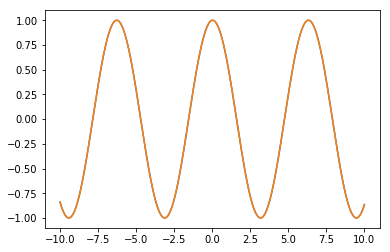

In [49]:
y=create_vector(cos,400,20)
aaaH=FT(y)
Haaa=FFT(aaaH)
z=np.linspace(-10,10,400)
plt.plot(z,Haaa)
plt.plot(z,y)

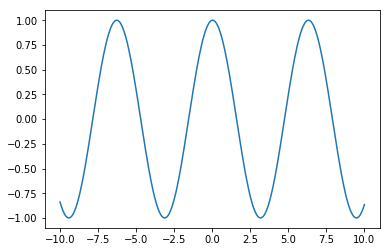

In [56]:
sdf=np.fft.fft((np.array(y)))
adsf=np.fft.ifft(sdf)
sdf=np.fft.fftshift(sdf)
plt.plot(np.linspace(-10,10,400),adsf.real)

### Exercise 2 (50 points)

Implement the split step Fourier algorithm using the numpy FFT and iFFT functions.

Test your code by propagating a Gaussian wave packet in free space. 

Calculate mean and variance at each time and plot them. Does you observation match your expectation?

Animate the time evolution of the wave packet as we did in exercise 5 of programming exercise 1.

Here are some example parameter that you could use:

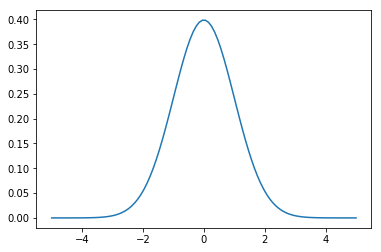

In [63]:
def Gauss(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
x=np.linspace(-5,5,100)
plt.plot(x,Gauss(x))

In [64]:
def Gaussian(x,sig,mu):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

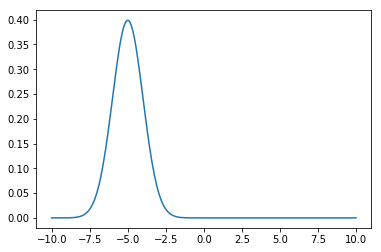

In [65]:
# define the grid
L = 20
npoints = 256

# parameters of the wave packet
x0 = -5;
sigma = 1;
p0 = 1;
x=np.linspace(-10,10,256)
plt.plot(x,)
#time steps
dt = 0.1;
tsteps = 50;

In [57]:
from numpy.fft import fft,ifft
initial=create_vector(Gaussian,256,20,1,-5)
def split_stepFourier(V,array,dt,tsteps,p0):
    Phi=array
    Psi=[]
    for t in range(tsteps):
        if t%2==0:
            Phi=ifft(np.exp(-dt*p0**2/2*1j)*fft(np.exp(-dt/2)*1j*)
            Psi_odd=np.exp(-h)
        else:
            

SyntaxError: invalid syntax (<ipython-input-57-dbbeb0d1cd24>, line 4)

In [ ]:
def DFT(a,inverse=False): #no need for L
    
    #if L<0:# or N<0:
    #    raise ValueError('The lenght and number of gridpoints needs to be a positive number.')
    if len(a)%2==1:
        raise ValueError('Number of gridpoints needs to be an even number.')
    #define the sign of the exponent:
    s=1 if inverse else -1
    #create grid:
    #x=np.linspace(-L/2,L/2,len(a)) #unnötig
    #dx=L/N
    #result array A
    A=[]
    def transform(k):
        Ak=0
        for i in range(len(a)):
            Ak+=a[i]*np.exp(2j*np.pi*k*i*s/len(a))
        if inverse:
            return Ak/len(a)
        else:
            return Ak
    for i in range(len(a)):
        A.append(transform(i))
    return np.roll(A,-int(len(A)/2)) #rearrange
#inverse DFT outsourced:
def iDFT(A,L,N):
    return DFT(A,L,N,inverse=True)
grid=100
a=np.linspace(-10,10,grid)
def box(x,T,N):
    b=np.zeros(N)
    b[abs(x)<=T]=1
    return b
x=box(a,.5,grid)

Try out different parameters. What happens if you choose a momentum p0 which is larger than the largest momentum on you momentum space grid?

[[Bonus task (not graded): Compare the results to the exact analytical solution for a propagating wave packet. Try to increase the spatial and temporal step size to see how the error depends on them. You can also look at the wave packet in Fourier space, where the analytical solution is even simpler.]]

Let the wave packet from before evolve in a harmonic potential (with p0=0). Start with a wave packet that is initially at rest but displaced from the ceneter of the hanmonic potential.

Again, calculate temporal evolution of mean and variance and visualize the wave packet evolution in an animation. Is what you observe consistent with your expectation? (A Gaussian wave packet in a harmonic potential is called a coherent state. What did you learn about these in your quantum mechanics lecture?)

Now simulate the scattering off a potential step $V(x)=\theta(x)$. Choose different initial velocities. Interpret your results. What happens when the reflected wave packet reaches the boundary of the spatial grid?

Example parameters:

In [69]:
def potential_step(x,h):
    for i in range(len(x)):
        if x[i]<=5:
            x[i]=0
        else:
            x[i]=h

In [13]:
# define the grid
L = 40
npoints = 512

# parameters of the wave packet
x0 = -10;
sigma = 2;
p0 = 1;# try also 1.5 and 2

#time steps
dt = 0.1;
tsteps = 250;

[[Bonus question: Be creative! Let your wave packet propagate through a potential barrier, across a well, or down a step etc. Measure the reflected and transitted pobability (and the probability to be inside the barrier) as a function of time and study the transmission systematically as a function of the initial momentum...]]

In [18]:
def ab(x,mu,sig):
    return x,mu,sig
def test(x,*args):
    print(ab(x,*args))

In [19]:
test(2,3,4)

(2, 3, 4)


In [ ]:
for a in range(10):
    Psi